In [547]:
# Commands to install some of the libraries in-case if they are not installed
# Any other library that needs to be installed just use: !pip install <library name>
# !pip install seaborn
# !pip install missingno
# !pip install xgboost
# !pip install catboost
# !pip install regex
# !pip install sklearn
# !pip install pandas
# !pip install numpy
# !pip install imblearn
# !pip install lightgbm

In [584]:
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt  #graphs and plots
import seaborn as sns   #data visualizations 
import csv # Some extra functionalities for csv  files - reading it as a dictionary
from lightgbm import LGBMClassifier #sklearn is for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction 
import math
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_validate   #break up dataset into train and test sets

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (r2_score, mean_squared_error, classification_report, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score)


# importing python library for working with missing data
import missingno as msno
# To install missingno use: !pip install missingno
import re    # This library is used to perform regex pattern matching

# import various functions from sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [549]:
diabetes = pd.read_csv('diabetic_data.csv')

In [550]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [551]:
diabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [552]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

**Data Cleaning**



the encounter id and patient number are an identifiers to uniquely identify the visit of a patient in a hospital. each of the rows are individual instances. there are no importance of these variables from prediction point to of view, so we should just drop these columns.

In [553]:
diabetes.drop(['encounter_id','patient_nbr'], axis=1, inplace=True)

In [554]:
def missing (diabetes):
    missing_number = diabetes.isnull().sum().sort_values(ascending=False)
    missing_percent = (diabetes.isnull().sum()/diabetes.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent']).round(4)*100
    return missing_values

missing(diabetes).head()

,Missing_Number,Missing_Percent
max_glu_serum,9642000,94.75
A1Cresult,8474800,83.28
race,0,0.00
troglitazone,0,0.00
acetohexamide,0,0.00


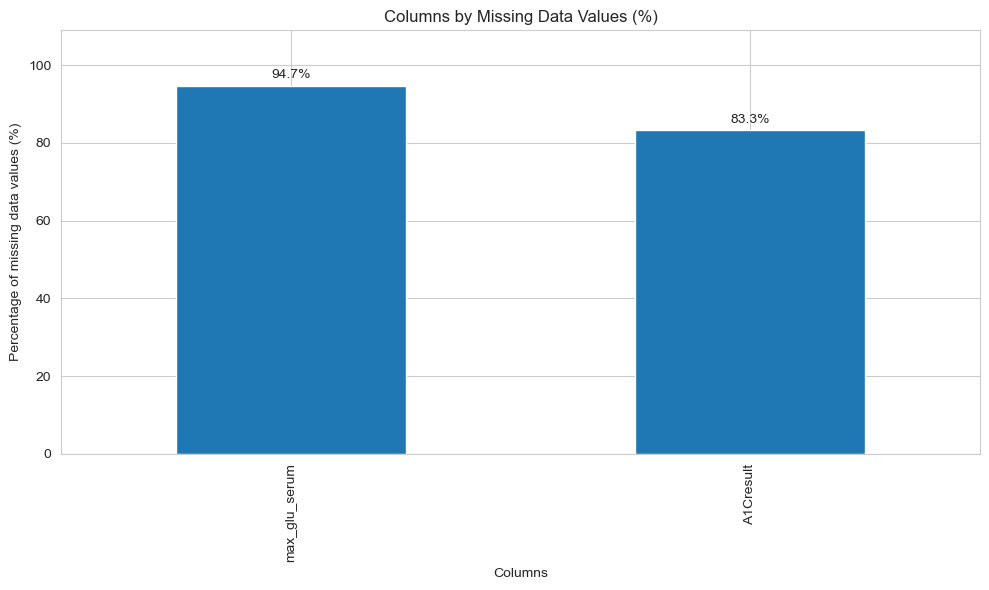

In [555]:
missing_data_pct = diabetes.isna().mean().sort_values(ascending=False) * 100
missing_data_pct_positive = missing_data_pct[missing_data_pct > 0]
plt.figure(figsize=(10,6))
plt1 = missing_data_pct_positive.plot(kind='bar')
plt1.bar_label(plt1.containers[0], padding=3, fmt='%.1f%%')
plt.ylabel('Percentage of missing data values (%)')
plt.xlabel('Columns')
plt.title('Columns by Missing Data Values (%)')
plt.xticks(rotation=90)
plt.ylim(0, missing_data_pct_positive.max() * 1.15)
plt.tight_layout()
plt.show()

this bar chart illustrates a data quality assessment of missing values in the diabetes dataset. specifically, variables like weight, max_glu_serum, and A1Cresult are missing over 83% of their data, making them primary candidates for cleaning and potential removal. the chart suggests that while the administrative and diagnostic data is clean, the physical and laboratory measurements in this dataset are largely absent and may introduce significant bias.

In [556]:
diabetes.duplicated().sum() # no duplicated records

np.int64(0)

Replaced ? values with null values. Replaced admission type 6, discharge disposition 18, admission source id 17 with null values, according to IDS mapping.

In [557]:
diabetes.replace("?", np.nan, inplace=True)
diabetes['admission_type_id'] = diabetes['admission_type_id'].replace(6, np.nan)
diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].replace(18, np.nan)
diabetes['admission_source_id'] = diabetes['admission_source_id'].replace(17, np.nan)

**Data Analysis**

In [558]:
categorical = [
    'race', 'gender', 'age', 'weight', 'payer_code', 
    'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 
    'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
    'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
    'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'
]

numerical = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses'
]

In [559]:
diabetes[numerical].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [560]:
diabetes[numerical].skew()

time_in_hospital       1.133999
num_lab_procedures    -0.236544
num_procedures         1.316415
num_medications        1.326672
number_outpatient      8.832959
number_emergency      22.855582
number_inpatient       3.614139
number_diagnoses      -0.876746
dtype: float64

when mean > median - data is skewed towards right (positive skew), mean < median - data is skewed left (negative skew), mean ~ median (symmetric). <br> time_in_hospital 4.39 > 4.00, slightly skewed right. number_diagnoses 7.42 < 8.00, slightly skewed left.

array([[<Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>],
       [<Axes: title={'center': 'num_medications'}>,
        <Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>],
       [<Axes: title={'center': 'number_inpatient'}>,
        <Axes: title={'center': 'number_diagnoses'}>, <Axes: >]],
      dtype=object)

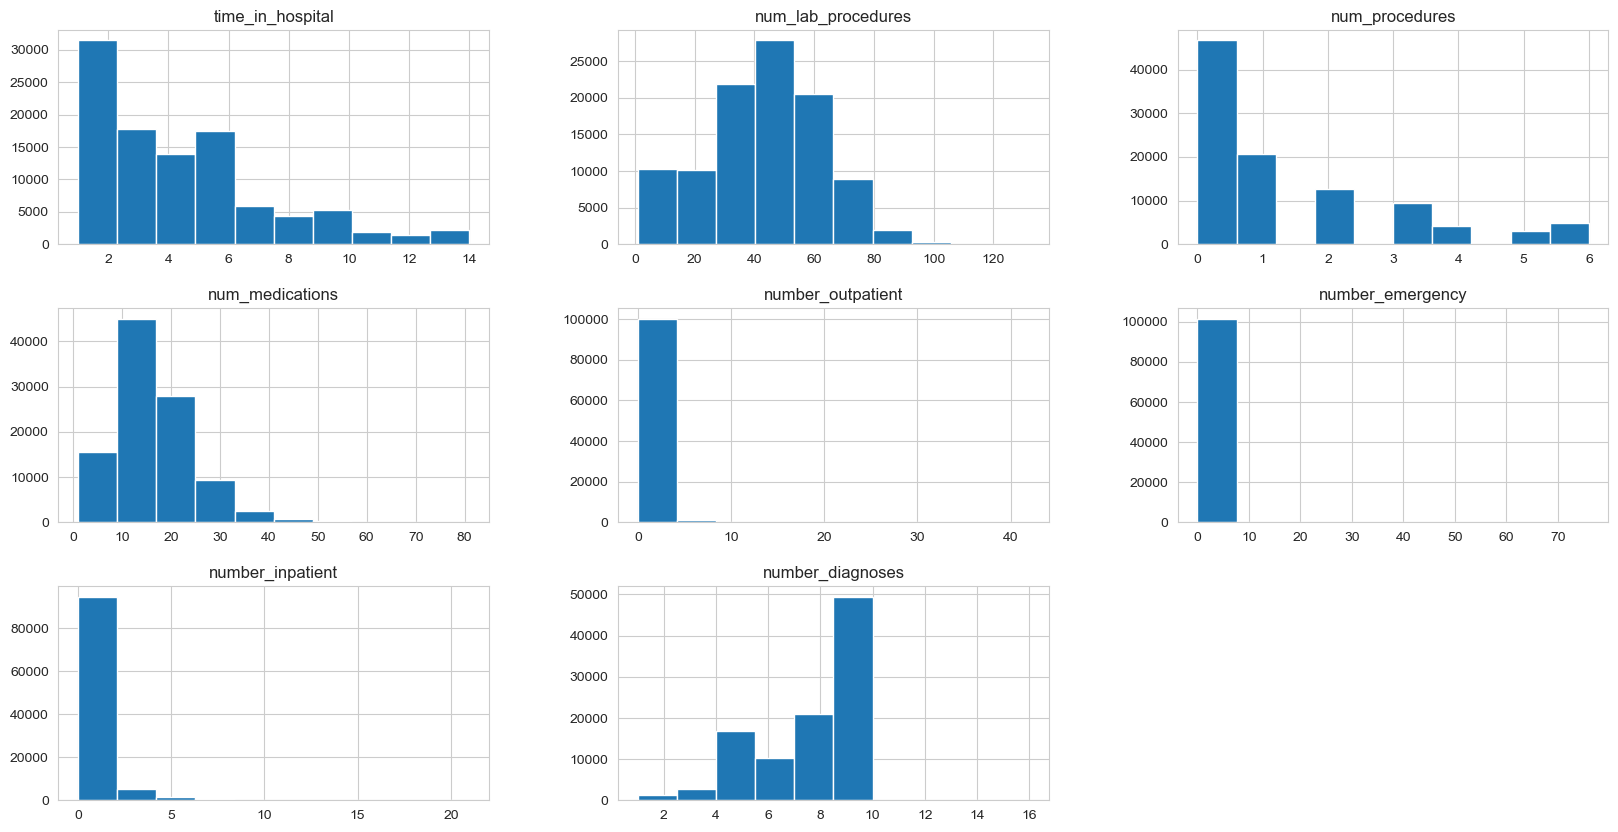

In [561]:
diabetes[numerical].hist(figsize=(20,10))

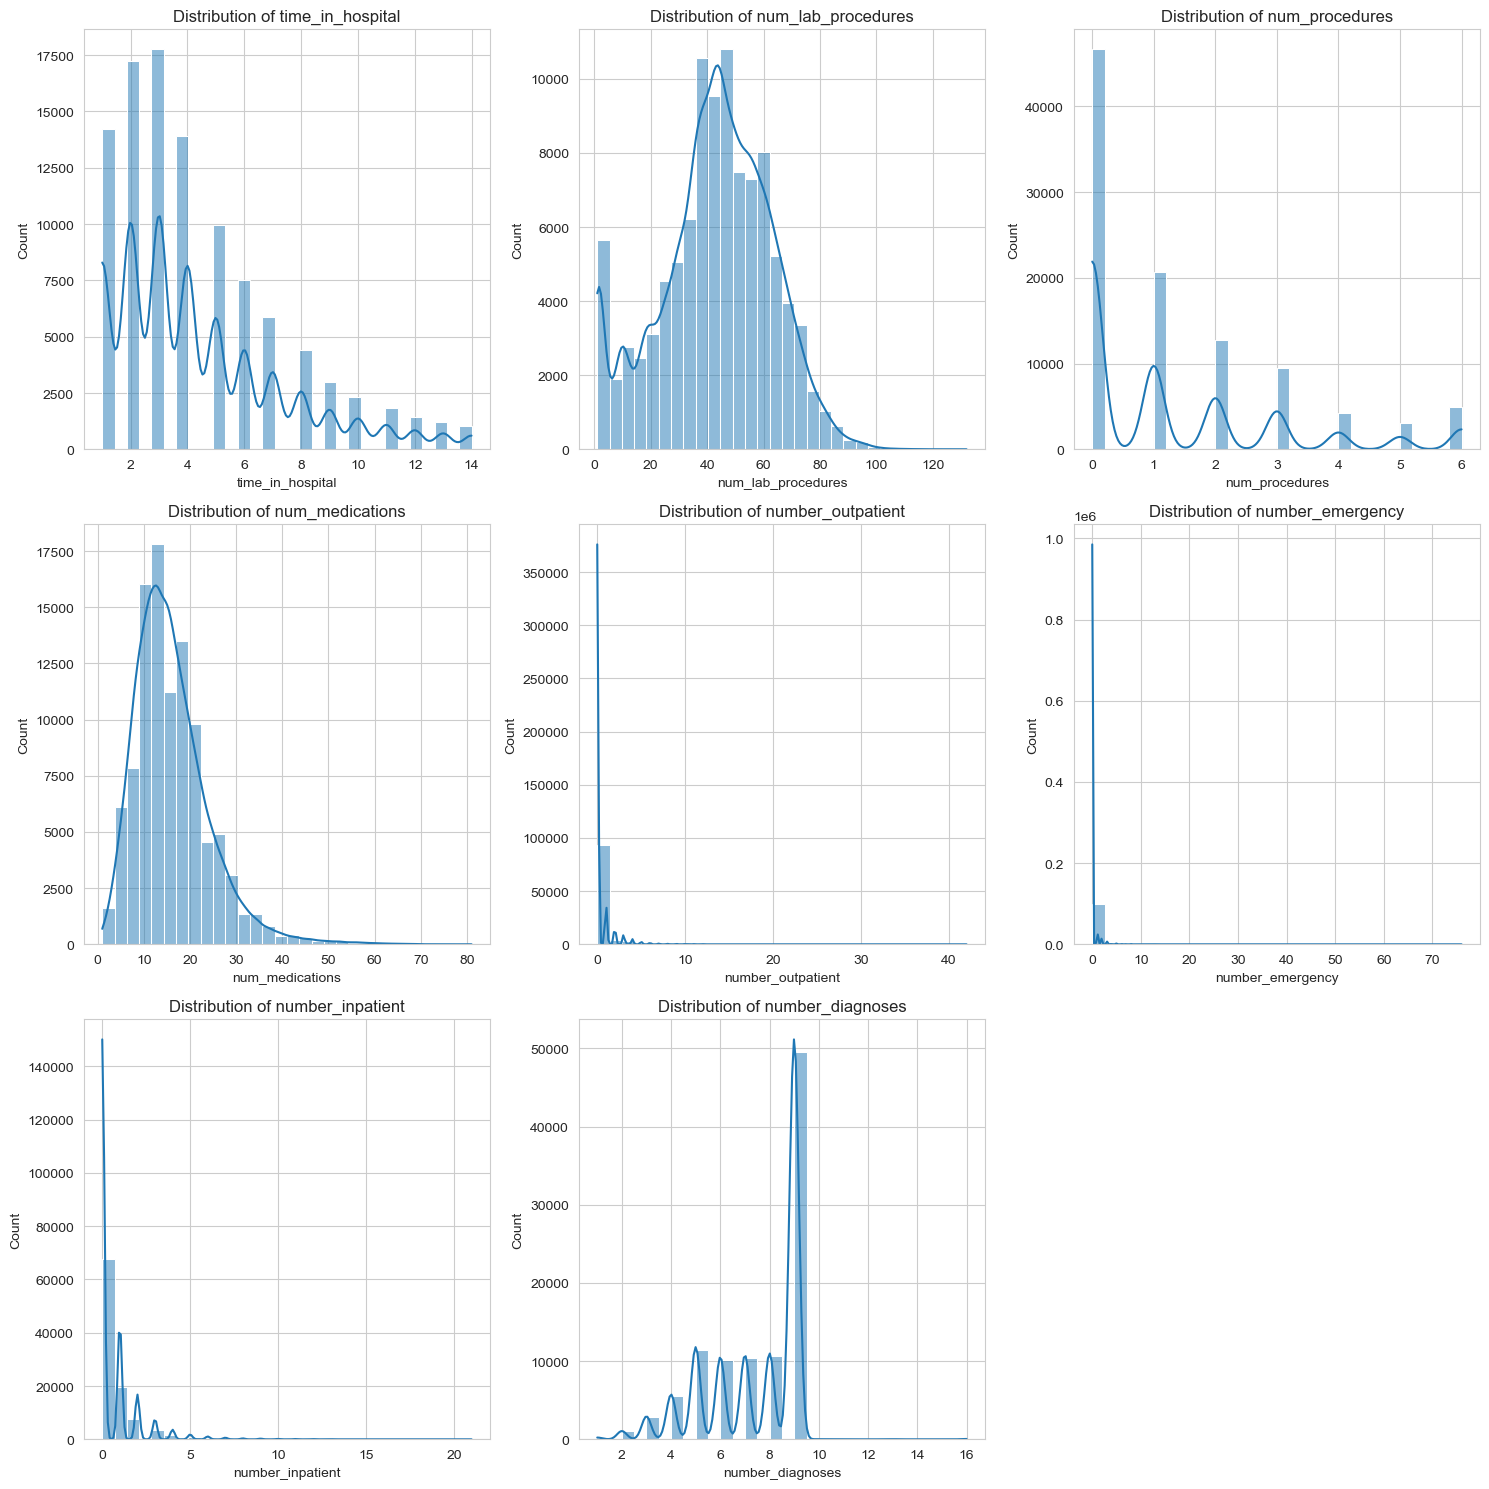

In [562]:
cols = 3
rows = math.ceil(len(numerical) / cols)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical, 1):
    plt.subplot(rows, cols, i) # Uses the dynamic 'rows' count
    sns.histplot(diabetes[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [563]:
diabetes[categorical].describe()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,5346,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,17,72,716,748,789,3,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,Norm,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,2597,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [564]:
diabetes[numerical].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


pearson correlation coefficient test relationship between variables on a scale of -1 to +1. the strongest relationship is between time_in_hospital vs num_medications (0.466), longer a patient stays in hospital the more medication prescribed to them. also strong relationship between num_medication vs num_procedures (0.386) and time_in_hospital vs num_lab_procedures (0.318). patients undergoing more procedures tend to require more medications as well and the longer stay in hospital results in more lab work and monitoring of the patient.

In [565]:
# probability for 'No' metformin - no if the drug was not prescribed
prob_no_met = (diabetes[diabetes["metformin"] == "No"]["readmitted"] == "<30").mean() * 100

# probability for 'Steady' metformin - steady if the dosage did not change
prob_steady_met = (diabetes[diabetes["metformin"] == "Steady"]["readmitted"] == "<30").mean() * 100

print(f"Probability of a patient to be readmitted within 30 days with no metformin prescribed: {round(prob_no_met, 2)}%")
print(f"Probability of a patient to be readmitted within 30 days with no metformin dosage change: {round(prob_steady_met, 2)}%")

Probability of a patient to be readmitted within 30 days with no metformin prescribed: 11.52%
Probability of a patient to be readmitted within 30 days with no metformin dosage change: 9.71%


In [566]:
# up if the dosage was increased during the encounter, down if the dosage was decreased
any_change = (diabetes["metformin"] == "Up") | (diabetes["metformin"] == "Down")

# probability for patients with a dosage change
prob_change = (diabetes[any_change]["readmitted"] == "<30").mean() * 100

print(f"Probability of a patient to be readmitted within 30 days with any metformin dosage change: {round(prob_change, 2)}%")

Probability of a patient to be readmitted within 30 days with any metformin dosage change: 9.56%


In [567]:
# probability of <30 readmission for every metformin category
metformin_analysis = diabetes.groupby("metformin")["readmitted"].apply(lambda x: (x == "<30").mean() * 100)

print("Probability of a patient to be readmitted within 30 days by metformin status:")
print(metformin_analysis.round(2).astype(str) + '%')

Probability of a patient to be readmitted within 30 days by metformin status:
metformin
Down       12.0%
No        11.52%
Steady     9.71%
Up         8.25%
Name: readmitted, dtype: object


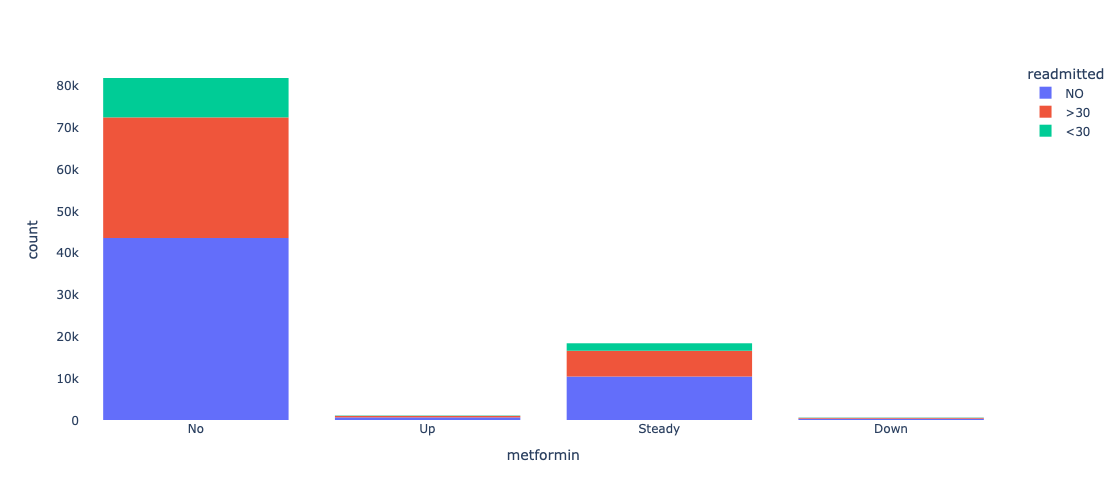

In [568]:
fig = px.histogram(
    diabetes, 
    x="metformin", 
    color="readmitted", 
    barmode="relative", # This creates the stacked effect
    category_orders={"readmitted": ["NO", ">30", "<30"], 
                     "metformin": ["No", "Up", "Steady", "Down"]},
    height=500,
    width=1000
)

# 3. Match the styling of your reference image
fig.update_layout(
    plot_bgcolor='white',
    xaxis_title="metformin",
    yaxis_title="count",
    legend_title="readmitted"
)

fig.show()

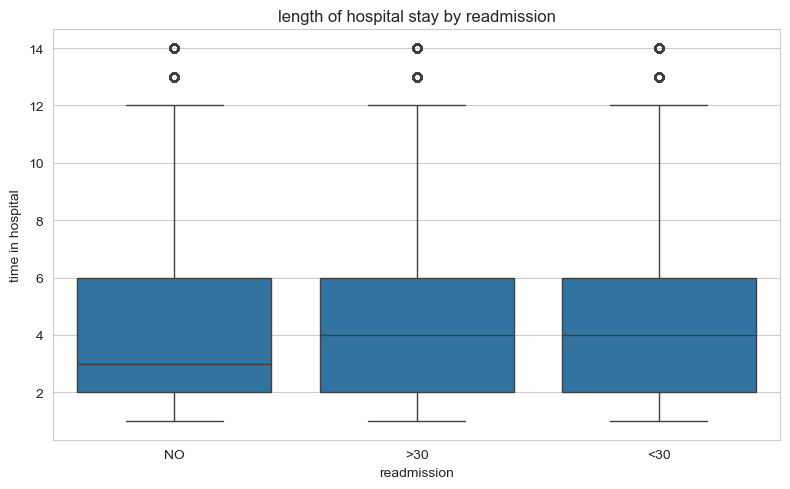

In [569]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='readmitted',
    y='time_in_hospital',
    data=diabetes
)
plt.title('length of hospital stay by readmission')
plt.xlabel('readmission')
plt.ylabel('time in hospital')
plt.tight_layout()
plt.show()

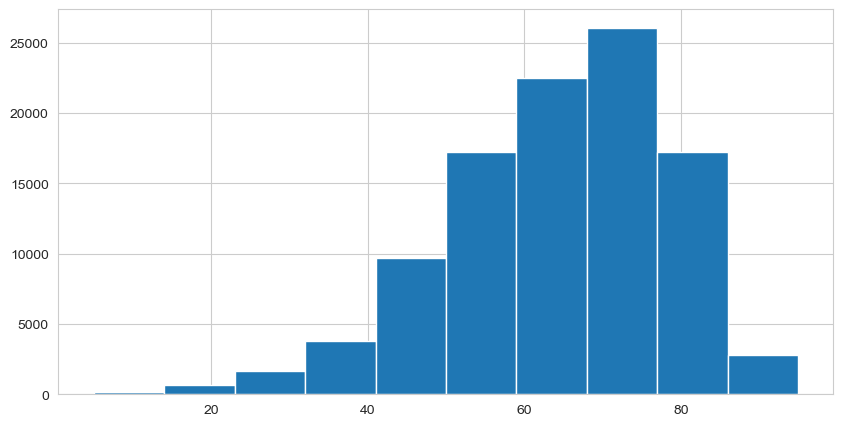

In [570]:
# mapping dictionary that assigns the median value of the age range, to convert this categorical column to numerical
age_map = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, 
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, 
    '[80-90)': 85, '[90-100)': 95
}

diabetes['age_num'] = diabetes['age'].map(age_map)
diabetes['age_num'].skew()
diabetes['age_num'].hist(figsize=(10,5));

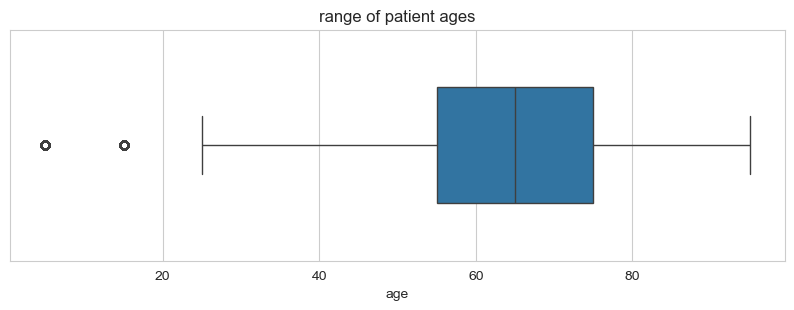

<Figure size 640x480 with 0 Axes>

In [571]:
plt.figure(figsize=(10, 3))
sns.set_style("whitegrid")
sns.boxplot(x=diabetes['age_num'], width=0.5)
plt.title('range of patient ages', fontsize=12)
plt.xlabel('age', fontsize=10)

plt.show()
plt.tight_layout()

This boxplot reveals that the patient population is heavily concentrated in older age brackets, with a median age of approximately 65 and the middle 50% of the data (the interquartile range) spanning from roughly 55 to 75 years old. The distribution is left-skewed, as evidenced by the long left whisker and the presence of two statistical outliers on the far left, representing a small number of unusually young patients (likely around ages 5 and 15) compared to the rest of the group. While the overall range extends from 5 to 95, the bulk of the data points suggests that this dataset primarily tracks a senior demographic.

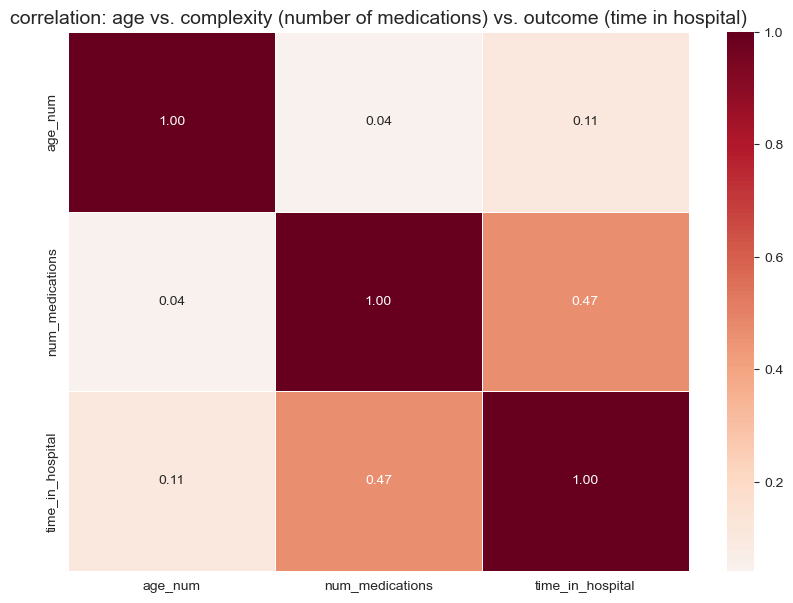

                   age_num  num_medications  time_in_hospital
age_num           1.000000         0.041847          0.107515
num_medications   0.041847         1.000000          0.466135
time_in_hospital  0.107515         0.466135          1.000000


In [572]:
# testing the correlation between the 3 variables: age, number of medications, and time in hospital
# correlation score between -1 and 1 for each pair
age_med_time = ['age_num', 'num_medications', 'time_in_hospital']
corr_matrix = diabetes[age_med_time].corr()

# heatmap visualization
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='RdBu_r',
            center=0, # neutral pt
            fmt=".2f", # round 2
            linewidths=0.5)

plt.title('correlation: age vs. complexity (number of medications) vs. outcome (time in hospital)', fontsize=14)
plt.show()
print(corr_matrix)

this heatmap shows a negligible correlation (0.11) between age and time in hospital, whereas the number of medications shows a much stronger moderate correlation (0.47) with hospital stay length. age and medication count are almost entirely unrelated (0.04), suggesting that the medical severity of a patient's condition is independent of how old they are.

**Train dataset**

Remapped the readmitted column to those who readmitted (1) vs those who aren't readmitted (0)

In [573]:
readmitted_mapping = {
    'NO': 0,
    '<30':1,
    '>30': 1
}

diabetes['readmit'] = diabetes['readmitted'].map(readmitted_mapping)

train_df, valid_df, test_df = np.split(diabetes.sample(frac=1, random_state=42), 
                                       [int(.7*len(diabetes)), int(0.85*len(diabetes))])
train_df = train_df.reset_index(drop = True)
valid_df = valid_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

diabetes.readmit.value_counts()

/opt/anaconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



readmit
0    54864
1    46902
Name: count, dtype: int64

In [574]:
train_df.readmit.value_counts()

readmit
0    38357
1    32879
Name: count, dtype: int64

In [575]:
valid_df.readmit.value_counts()

readmit
0    8263
1    7002
Name: count, dtype: int64

In [576]:
test_df.readmit.value_counts()

readmit
0    8244
1    7021
Name: count, dtype: int64

In [577]:
def calc_prevalence(y_actual):
    
    '''
    This function is to understand the ratio/distribution of the classes that we are going to predict for.
    
    Params:
    1. y_actual: The target feature
    
    Return:
    1. (sum(y_actual)/len(y_actual)): The ratio of the postive class in the comlpete data.
    '''
    
    return (sum(y_actual)/len(y_actual))

In [578]:
# split the training data into positive and negative
rows_pos = train_df.readmit == 1
df_train_pos = train_df.loc[rows_pos]
df_train_neg = train_df.loc[~rows_pos]

# merge the balanced data
diabetes_df_balanced = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 111)],axis = 0)

# shuffle the order of training samples 
diabetes_df_balanced = diabetes_df_balanced.sample(n = len(diabetes_df_balanced), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(diabetes_df_balanced), \
                                                calc_prevalence(diabetes_df_balanced.readmit.values)))

Train balanced prevalence(n = 65758):0.500


In [579]:
diabetes_df_balanced.readmit.value_counts()

readmit
0    32879
1    32879
Name: count, dtype: int64

In [580]:
X_train = diabetes_df_balanced.drop('readmit',axis=1)

y_train = diabetes_df_balanced['readmit']

X_valid = valid_df.drop('readmit',axis=1)

y_valid = valid_df['readmit']

X_test = test_df.drop('readmit',axis=1)

y_test = test_df['readmit']

**Linear Regression**

In [581]:
df = diabetes_df_balanced.copy()

In [582]:
var = ['num_lab_procedures', 'num_medications', 'number_diagnoses', 'time_in_hospital']

In [585]:
X = df[var]
y = df['readmit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train_s, y_train)
y_pred = lin_model.predict(X_test_s)

# converting continuous linear predictions to binary labels (0 or 1)
y_pred_binary = (y_pred >= 0.5).astype(int)

# classification metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary, zero_division=0)

print('Linear Regression')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'Intercept: {lin_model.intercept_:.4f}')

print('\nCoefficients - sorted by impact:')
coef_df = pd.DataFrame({'Variables': var, 'Coefficient': lin_model.coef_})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_df.to_string(index=False))


Linear Regression
Accuracy: 0.5518
Precision: 0.5411
Recall: 0.6533
R^2 Score: 0.0155
RMSE: 0.4961
Intercept: 0.5006

Coefficients - sorted by impact:
         Variables  Coefficient
  number_diagnoses     0.053182
  time_in_hospital     0.011737
num_lab_procedures     0.006586
   num_medications     0.002741


the linear regression results indicate that medical complexity is the primary driver of patient readmissions in your dataset, though the overall predictive power of these specific variables is quite low. With an R^2 score of 0.0155, the model only explains about 1.55% of why patients return to the hospital, suggesting that most of the "readmit" behavior is influenced by factors outside of your current feature set. Among the variables used, number_diagnoses stands out as the most significant predictor with a coefficient of 0.0532, followed by time_in_hospital (0.0117). This suggests that as a patient's health complexity and stay duration increase, their likelihood of readmission also rises. However, the relatively high RMSE of 0.4961 and the intercept of 0.5006 highlight that the model currently struggles with precision, essentially defaulting to a near 50/50 prediction for the average patient.